In [6]:
import numpy as np

from math import copysign, hypot

def _givens_rotation_matrix_entries(a, b):
    """Compute matrix entries for Givens rotation."""
    r = hypot(a, b)
    if r < 1e-05:
        return (1, 0)
    c = a/r
    s = -b/r

    return (c, s)

def QRGivens(A):
    print('\n\n')
    """Perform QR decomposition of matrix A using Givens rotation."""
    (num_rows, num_cols) = np.shape(A)

    # Initialize orthogonal matrix Q and upper triangular matrix R.
    Q = np.identity(num_rows)
    R = np.copy(A)
    phi_list = []

    # Iterate over lower triangular matrix.
    (rows, cols) = np.tril_indices(num_rows, -1, num_cols)
    for (row, col) in zip(rows, cols):

        # Compute Givens rotation matrix and
        # zero-out lower triangular matrix entries.
        (c, s) = _givens_rotation_matrix_entries(R[col, col], R[row, col])

        G = np.identity(num_rows)
        G[[col, row], [col, row]] = c
        phi = np.arccos(c)
        
        if s < 0:
            phi = -phi
        
        phi_list.append(phi)

        G[row, col] = s
        G[col, row] = -s

        R = np.dot(G, R)
        Q = np.dot(Q, G.T)

    return Q, R, phi_list

def Givens2Matrix(phi_list):
    d  = int((1 + np.sqrt(1 + 8 * len(phi_list))) / 2)
    ret_val = np.eye(d)
    i = 0
    (rows, cols) = np.tril_indices(d, -1, d)
    for (row, col) in zip(rows, cols):
        
        c = np.cos(phi_list[i])
        s = np.sin(phi_list[i])
        i += 1

        G = np.eye(d)
        G[[col, row], [col, row]] = c

        G[row, col] = s
        G[col, row] = -s

        ret_val = np.dot(ret_val, G.T)
        
    return ret_val
        
    
d = 50
eigenvalues = np.random.uniform(1, 16, size=d)
rotation_angels = np.random.uniform(-np.pi / 4, 3 * np.pi / 4, size=int(d * (d - 1) / 2))

V = Givens2Matrix(rotation_angels)

spd_matr = V @ np.diag(eigenvalues) @ V.T

# spd_matr_1 = createCovMatr_from_params(eigenvalues, rotation_angels)
# print(np.linalg.norm(spd_matr - spd_matr_1))

eigenval_spec, v = np.linalg.eigh(spd_matr)

q, r, phi_list = QRGivens(v)

# print(np.diag(r), phi_list)

v_rec = Givens2Matrix(phi_list)

np.linalg.norm(v_rec @ np.diag(eigenval_spec) @ v_rec.T - spd_matr)

2.128622964121257e-07

In [12]:

def QRGivens(A):
    if np.linalg.det(A) < 0:
        A = -A
    """Perform QR decomposition of matrix A using Givens rotation."""
    (num_rows, num_cols) = np.shape(A)

    # Initialize orthogonal matrix Q and upper triangular matrix R.
    Q = np.identity(num_rows)
    R = np.copy(A)
    phi_list = []

    # Iterate over lower triangular matrix.
    (rows, cols) = np.tril_indices(num_rows, -1, num_cols)
    i = 0
    for (row, col) in zip(rows, cols):
        i += 1

        # Compute Givens rotation matrix and
        # zero-out lower triangular matrix entries.
        (c, s) = _givens_rotation_matrix_entries(R[col, col], R[row, col])


        phi = np.arccos(c)
        # if sin(phi) < 0
        if s > 0:
            phi = -phi

        # Turning first element into 1 instead of -1
        if c * R[col, col] - s * R[row, col] < 0:
            phi = phi - np.pi
            c = -c
            s = -s

        # G = np.identity(num_rows)
        # G[col, col] = c
        # G[row, row] = c
        # phi_list.append(phi)
        # G[row, col] = s
        # G[col, row] = -s



        R[col], R[row] = R[col]*c + R[row]*(-s), R[col]*s + R[row]*c
        Q[:, col], Q[:, row] = Q[:, col]*c + Q[:, row]*(-s), Q[:, col]*s + Q[:, row]*c

        # R = np.dot(G, R)

        # Q = np.dot(Q, G.T)

    return Q, R, phi_list


In [13]:
%timeit QRGivens(v)

42.3 ms ± 698 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit np.linalg.g(v)

In [19]:
import timeit
print(timeit.timeit("QRGivens(v)", "from __main__ import QRGivens"))

NameError: name 'v' is not defined

In [20]:
from utils import eigh_with_fixed_direction_range

from python_example import Givens2Matrix_double as Givens2Matrix
from python_example import QRGivens_double as QRGivens
import numpy as np


In [21]:
from utils import load_seg_data

from sklearn.mixture import GaussianMixture

data = load_seg_data()
n_comp = 10

gmm = GaussianMixture(n_components=n_comp, covariance_type='full', n_init=10, max_iter=100,  init_params='k-means++')
gmm.fit(data)


weights = gmm.weights_
means = gmm.means_
basic_prec_matr = np.zeros_like(gmm.precisions_cholesky_)
for i in range(gmm.precisions_cholesky_.shape[0]):
    basic_prec_matr[i] = gmm.precisions_cholesky_[i] @ gmm.precisions_cholesky_[i].T
d = basic_prec_matr[i].shape[0]

print(gmm.score(data))

69.63899235014888


In [57]:
def get_ll(basic_prec_matr):
    gmm_new = GaussianMixture(n_components=n_comp, covariance_type='full', weights_init=weights, means_init=means, precisions_init=basic_prec_matr, max_iter=100)


    cholesky = np.zeros_like(basic_prec_matr)

    for i in range(n_comp):
        cholesky[i] = np.linalg.cholesky(basic_prec_matr[i])

    gmm.precisions_cholesky_ = cholesky

    print(gmm.score(data))

In [58]:
get_ll(basic_prec_matr)

69.63899235014888


In [59]:
eigvals = np.zeros([n_comp, d])

from utils import QRGivens, Givens2Matrix

from python_example import Givens2Matrix_double as Givens2Matrix
from python_example import QRGivens_double as QRGivens

givens_angles = np.zeros([n_comp, int(d * (d  - 1) / 2)])

for i in range(n_comp):
    eigenvalues, v = eigh_with_fixed_direction_range(basic_prec_matr[i])
    # eigenvalues, v = np.linalg.eigh(cov_matrix_list[i])
    givens_rotations = QRGivens(v).squeeze()
    # q, r, givens_rotations = QRGivens(v)
    eigvals[i] = eigenvalues
    # print(f'Eigenvalyes {eigenvalues[-5:]}')
    givens_angles[i] = givens_rotations

new_prec = np.zeros_like(basic_prec_matr)

for i in range(n_comp):

    v_new_prec = Givens2Matrix(np.expand_dims(givens_angles[i], axis=1))

    # v_new_prec = Givens2Matrix(givens_angles[i])
    # for j in range(d):
    #     print(np.dot(v_new_prec[j], v_new_prec[0]))
    # print(eigvals[i])
    new_prec[i] = v_new_prec @ np.diag(eigvals[i]) @ v_new_prec.T

    # print(np.linalg.eigvals(new_prec[i]))

print(np.linalg.norm(new_prec - basic_prec_matr))

get_ll(new_prec)

# prec_matrcies = np.zeros_like(basic_prec_matr)
# # construct prec matr addition
# for i in range(n_comp):
#     v = Givens2Matrix(np.expand_dims(self.position['givens_angles'][i], axis=1))
#     addition = v @ np.diag(self.position['eigenvalues_prec'][i]) @ v.T
#     prec_matrcies[i] = self.basic_prec_matr[i] + addition

# q, r, phi_list = QRGivens(v)


7.267695193111952e-07
69.63899235014888


In [3]:

d = 50
eigenvalues = np.random.uniform(1, 16, size=d)
rotation_angels = np.random.uniform(-np.pi / 4, 3 * np.pi / 4, size=int(d * (d - 1) / 2))

V = Givens2Matrix(rotation_angels)

spd_matr = V @ np.diag(eigenvalues) @ V.T

# spd_matr_1 = createCovMatr_from_params(eigenvalues, rotation_angels)
# print(np.linalg.norm(spd_matr - spd_matr_1))

eigenval_spec, v = np.linalg.eigh(spd_matr)

q, r, phi_list = QRGivens(v)

# print(np.diag(r), phi_list)

v_rec = Givens2Matrix(phi_list)

np.linalg.norm(v_rec @ np.diag(eigenval_spec) @ v_rec.T - spd_matr)

2.003313009585914e-07

/home/skholkin/projects/python_venv/lib/python3.10/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


[6 9 8 2 4 1 0 5 7 3]
[0.10526316 0.08133971 0.11004785 0.15311005 0.19617225 0.0430622
 0.13397129 0.0861244  0.02392344 0.06698565] [0.13397129 0.06698565 0.02392344 0.11004785 0.19617225 0.08133971
 0.10526316 0.0430622  0.0861244  0.15311005]
{'P1_1': 'P2_9', 'P1_3': 'P2_2', 'P1_4': 'P2_4', 'P1_6': 'P2_0', 'P1_9': 'P2_3', 'P1_8': 'P2_7', 'P1_2': 'P2_8', 'P1_5': 'P2_1', 'P1_7': 'P2_5', 'P1_0': 'P2_6', 'P2_9': 'P1_1', 'P2_2': 'P1_3', 'P2_4': 'P1_4', 'P2_0': 'P1_6', 'P2_3': 'P1_9', 'P2_7': 'P1_8', 'P2_8': 'P1_2', 'P2_1': 'P1_5', 'P2_5': 'P1_7', 'P2_6': 'P1_0'}


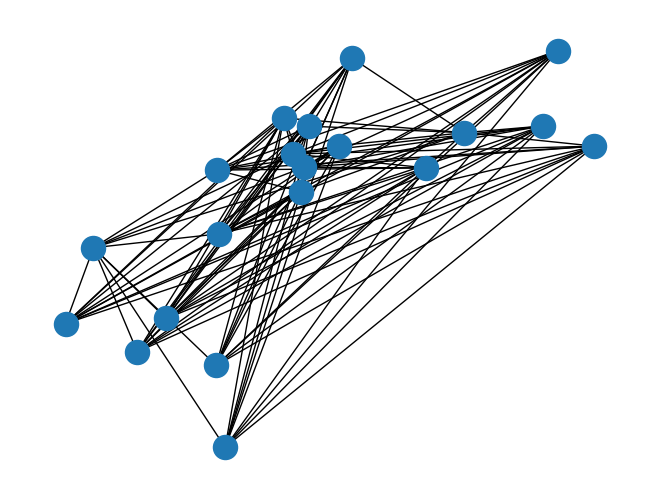

In [10]:
import networkx as nx
import numpy as np

from utils import load_seg_data
from sklearn.mixture import GaussianMixture
from itertools import product


data = load_seg_data()
n_comp = 10
n_particles = 50

eigvals_coef = 0.00003
means_coef = 0.00003

gmm = GaussianMixture(n_comp, covariance_type='full', max_iter=1, n_init=1, init_params='k-means++')
gmm.fit(data)

particle_1 = {'means': gmm.means_, 'weights': gmm.weights_, 'precision': gmm.precisions_}

permutation = np.random.permutation(particle_1['weights'].shape[0])
print(permutation)

particle_2 = {'means': gmm.means_[permutation], 'weights': gmm.weights_[permutation], 'precision': gmm.precisions_[permutation]}

print(particle_1['weights'], particle_2['weights'])

G = nx.Graph()

P1_nodes = [f'P1_{i}' for i in range(n_comp)]
P2_nodes = [f'P2_{i}' for i in range(n_comp)]
G.add_nodes_from(P1_nodes, bipartite=0)
G.add_nodes_from(P2_nodes, bipartite=1)


def divergence(mean_1, prec_1, mean_2, prec_2):
    return np.log(np.linalg.det(prec_1) / np.linalg.det(prec_2)) + np.trace(prec_1.dot(np.linalg.inv(prec_2))) + (mean_1 - mean_2).T @ prec_2 @ (mean_1 - mean_2)

edge_list = list(product([i for i in range(n_comp)], [i for i in range(n_comp)]))

for edge in edge_list:
    c = divergence(particle_2['means'][edge[1]], particle_2['precision'][edge[1]], particle_1['means'][edge[0]], particle_1['precision'][edge[0]])
    # print(c)
    G.add_edge(f'P2_{edge[0]}', f'P1_{edge[1]}', weight=c)

nx.draw(G)

my_matching = nx.algorithms.bipartite.matching.minimum_weight_full_matching(G, P1_nodes)
print(my_matching)